# ---------------------------------------------------------------------------------------------------------------
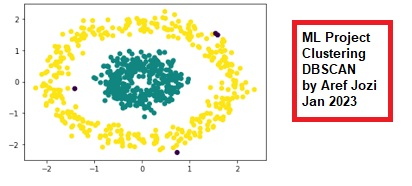

## Machine Learning Tutorials using Python
## Designed by : maktabkhooneh.org
## Tutor : Jadi Mirani
## Learner : Aref Jozi

#### This is my tutorial project of a dataset including some features about "customers" . The purpose is to identify their class/category (cluster) by unsupervised ML algorithms namely "K-Means" , "Hierarchical" , "DBSCAN" .
### this ipynb file is for : 3. DBSCAN

#### Done by Aref Jozi on Jan 2023

#### This project is designed by collaboration of maktabkhooneh and Jadi and represented in Season 4 (Clustering) of Machine Learning by Python
# ---------------------------------------------------------------------------------------------------------------

# 3.DBSCAN

### importing libraries

In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
import csv
import pandas as pd

filename='e:/1632560262896716.csv'

#Read csv
cust_df = pd.read_csv(filename)
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
Gender = cust_df['Gender'].replace(['Female','Male'],[0,1],inplace=True)
print(Gender)

None


In [5]:
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
print ("Shape of dataset: ", cust_df.shape)

Shape of dataset:  (200, 5)


In [7]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [8]:
cust_df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [9]:
cust_df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [10]:
cust_df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [11]:
cust_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
cust_df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [126]:
# making column names shorter
cust_df = cust_df.rename({'Annual Income (k$)': 'anin', 'Spending Score (1-100)': 'spsc'}, axis=1)
cust_df

,CustomerID,Gender,Age,anin,spsc,Clus_dbscan
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,-1
197,198,1,32,126,74,0
198,199,1,32,137,18,-1


### working on the dataset to know it better and trying to find the optimum epsilon and minimum samples

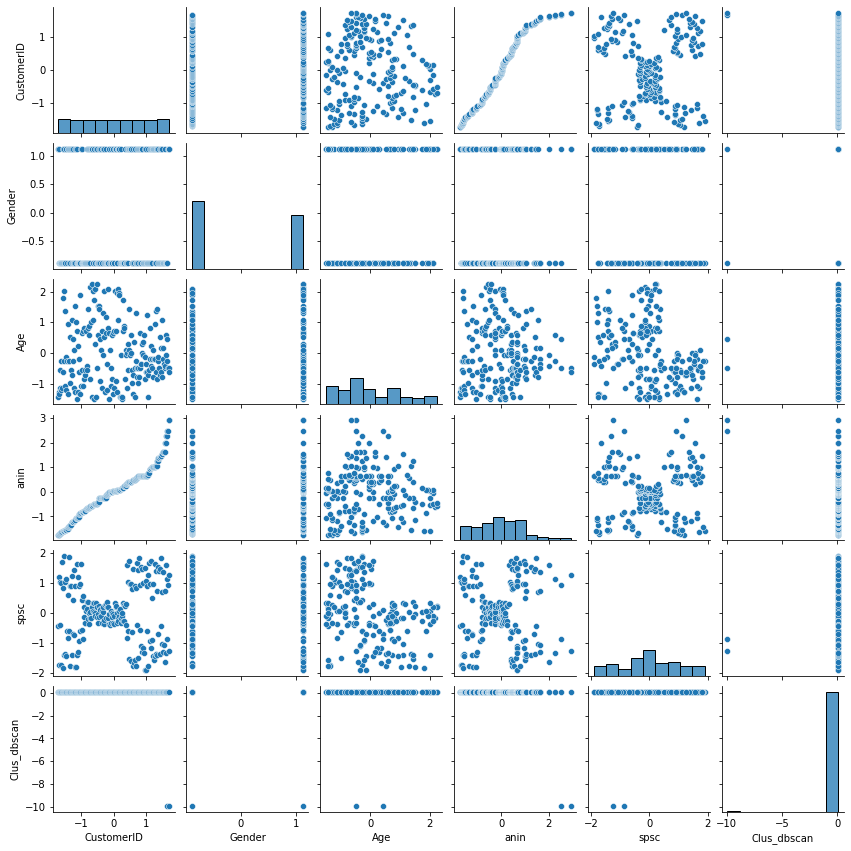

In [198]:
import seaborn as sns

sns.pairplot(stdDf, height=2);

In [98]:
from sklearn.preprocessing import StandardScaler
x = cust_df.values[:,2:]
Clus_dataSet = StandardScaler().fit_transform(x)
Clus_dataSet

array([[-1.42456879e+00, -1.73899919e+00, -4.34801480e-01,
         1.00503782e-01],
       [-1.28103541e+00, -1.73899919e+00,  1.19570407e+00,
         1.00503782e-01],
       [-1.35280210e+00, -1.70082976e+00, -1.71591298e+00,
         1.00503782e-01],
       [-1.13750203e+00, -1.70082976e+00,  1.04041783e+00,
         1.00503782e-01],
       [-5.63368514e-01, -1.66266033e+00, -3.95979919e-01,
         1.00503782e-01],
       [-1.20926872e+00, -1.66266033e+00,  1.00159627e+00,
         1.00503782e-01],
       [-2.76301755e-01, -1.62449091e+00, -1.71591298e+00,
         1.00503782e-01],
       [-1.13750203e+00, -1.62449091e+00,  1.70038436e+00,
         1.00503782e-01],
       [ 1.80493225e+00, -1.58632148e+00, -1.83237767e+00,
         1.00503782e-01],
       [-6.35135204e-01, -1.58632148e+00,  8.46310024e-01,
         1.00503782e-01],
       [ 2.02023231e+00, -1.58632148e+00, -1.40534050e+00,
         1.00503782e-01],
       [-2.76301755e-01, -1.58632148e+00,  1.89449216e+00,
      

In [178]:
epsilon = 15
minimumSamples = 15
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(x)
labels = db.labels_
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1,  0, -1, -1,  1,  1, -1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  2,  1,  2, -1,  2, -1,  2,  1,  2, -1,  2,
       -1,  2, -1,  2, -1,  2,  1,  2, -1,  2,  1,  2, -1,  2, -1,  2, -1,
        2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,
       -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [179]:
cust_df["Clus_dbscan"] = labels
cust_df.head()

,CustomerID,Gender,Age,anin,spsc,Clus_dbscan
0,1,1,19,15,39,-1
1,2,1,21,15,81,0
2,3,0,20,16,6,-1
3,4,0,23,16,77,0
4,5,0,31,17,40,-1


In [180]:
set(labels)

{-1, 0, 1, 2}

In [181]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
        True,  True, False,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,

In [182]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [183]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [184]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

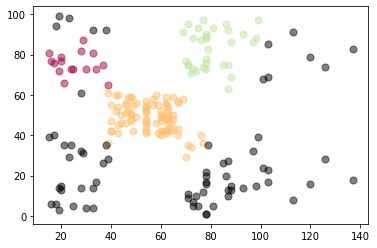

In [192]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = x[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 1], xy[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = x[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 1], xy[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

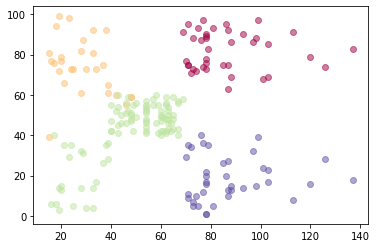

In [209]:
from sklearn.cluster import KMeans 
k = 4
k_means4 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means4.fit(x)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means4.labels_ == k)
    plt.scatter(x[my_members, 1], x[my_members, 2],  c=col, marker=u'o', alpha=0.5)
plt.show()